In [1]:
import torch

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
def get_circular_data(n_pts=500):
    X,y = datasets.make_circles(n_samples=n_pts,random_state=64,noise=0.1, factor=0.2)
    x_data = torch.Tensor(X)
    y_data = torch.Tensor(y).view(n_pts,1)
    return X,y,x_data,y_data

In [5]:
def scatter_plot(X,y):
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])

In [6]:
X,y,x_data,y_data = get_circular_data()

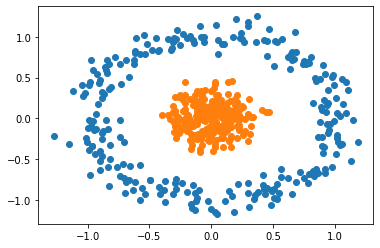

In [7]:
scatter_plot(X,y)

### Perceptron based neural network

In [8]:
from torch import nn

In [9]:
class Model(nn.Module):
    
    def __init__(self, input_size,H1, output_size):
        super().__init__()
        self.linear_0 = nn.Linear(in_features=input_size,out_features=H1)
        self.linear_1 = nn.Linear(H1, output_size)
    
    def forward(self,X):
        x = torch.sigmoid(self.linear_0(X))
        x= torch.sigmoid(self.linear_1(x))
        return x
        
    
    def predict(self,X):
        prob = self.forward(X)
        prob = prob.item()
        if prob>0.5:
            return 1
        else:
            return 0
        
    
    
    

In [10]:
torch.manual_seed(2)
model = Model(input_size=2,H1=4,output_size=1)

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683],
         [ 0.1939, -0.0361],
         [ 0.3021,  0.1683],
         [-0.0813, -0.5717]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True),
 Parameter containing:
 tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True),
 Parameter containing:
 tensor([0.2116], requires_grad=True)]

In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [13]:
epochs = 1000


In [14]:
losses = []

for i in range(epochs):
    pred = model.forward(x_data)
    loss = criterion(pred, y_data)
    losses.append(loss.item())
    print(f"Epoch: {i} loss: {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 loss: 0.7149761319160461
Epoch: 1 loss: 0.6947563886642456
Epoch: 2 loss: 0.6955375075340271
Epoch: 3 loss: 0.7015243768692017
Epoch: 4 loss: 0.701464056968689
Epoch: 5 loss: 0.6975607872009277
Epoch: 6 loss: 0.6940194368362427
Epoch: 7 loss: 0.6929430961608887
Epoch: 8 loss: 0.6940365433692932
Epoch: 9 loss: 0.6956049203872681
Epoch: 10 loss: 0.6961533427238464
Epoch: 11 loss: 0.6953223943710327
Epoch: 12 loss: 0.6936787366867065
Epoch: 13 loss: 0.6920489072799683
Epoch: 14 loss: 0.6909856796264648
Epoch: 15 loss: 0.6905228495597839
Epoch: 16 loss: 0.6902461647987366
Epoch: 17 loss: 0.6896059513092041
Epoch: 18 loss: 0.688248336315155
Epoch: 19 loss: 0.6861463189125061
Epoch: 20 loss: 0.6835087537765503
Epoch: 21 loss: 0.6805962324142456
Epoch: 22 loss: 0.6775698661804199
Epoch: 23 loss: 0.6744301915168762
Epoch: 24 loss: 0.6710490584373474
Epoch: 25 loss: 0.6672593951225281
Epoch: 26 loss: 0.6629459857940674
Epoch: 27 loss: 0.6580916047096252
Epoch: 28 loss: 0.65276134014129

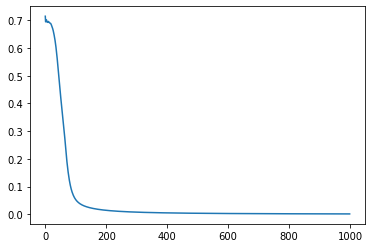

In [15]:
plt.plot(range(epochs),losses)

In [28]:
def plot_decision_boundary(X,y):
    x_span = np.linspace(min(X[:,0])-0.5,max(X[:,0])+0.5)
    y_span = np.linspace(min(X[:,1])-0.5,max(X[:,1])+0.5)
    xx,yy = np.meshgrid(x_span,y_span)
    grid = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx,yy,z)
    

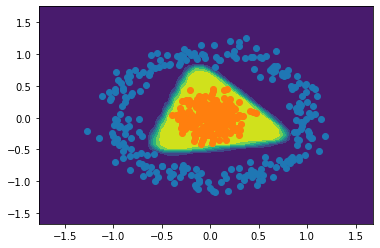

In [29]:
plot_decision_boundary(X,y)
scatter_plot(X,y)

prediction:1


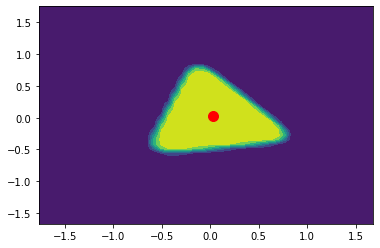

In [33]:
x = 0.025
y= 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker="o",markersize=10,color="red")
print(f"prediction:{prediction}")
plot_decision_boundary(X,y)